In [1]:
import json
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from pylab import rcParams

plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100

# Part 1 : Exploratory Data Analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [2]:
# Access the file
logins = pd.read_json('logins.json')

In [3]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
# Copy
df = pd.DataFrame.copy(logins)
# Change index to timestamp
df.set_index('login_time', inplace = True)
df['count'] = 1 
# Resample with 15 min intervals + aggregation
df_15 = df.resample('15T').sum()
df_15.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [6]:
# aggregation looks good

Text(0.5, 1.0, 'Login frequency in 15 min. intervals')

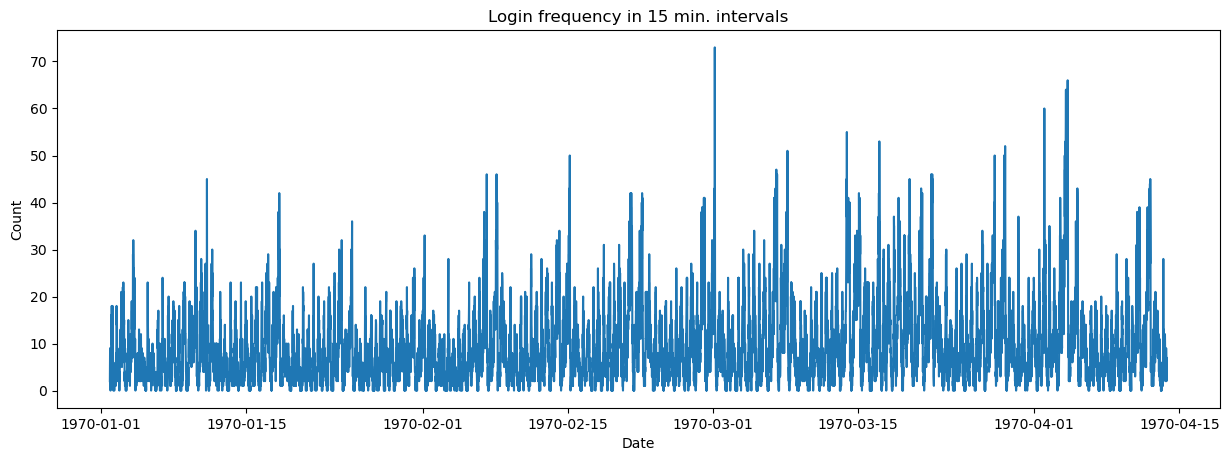

In [7]:
# Plot
plt.plot(df_15)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Login frequency in 15 min. intervals')

In [8]:
# The data is indicative of some sort of seasonality

[Text(0.5, 0, ' monthly interval'),
 Text(0, 0.5, 'User login count'),
 Text(0.5, 1.0, 'Monthly interval')]

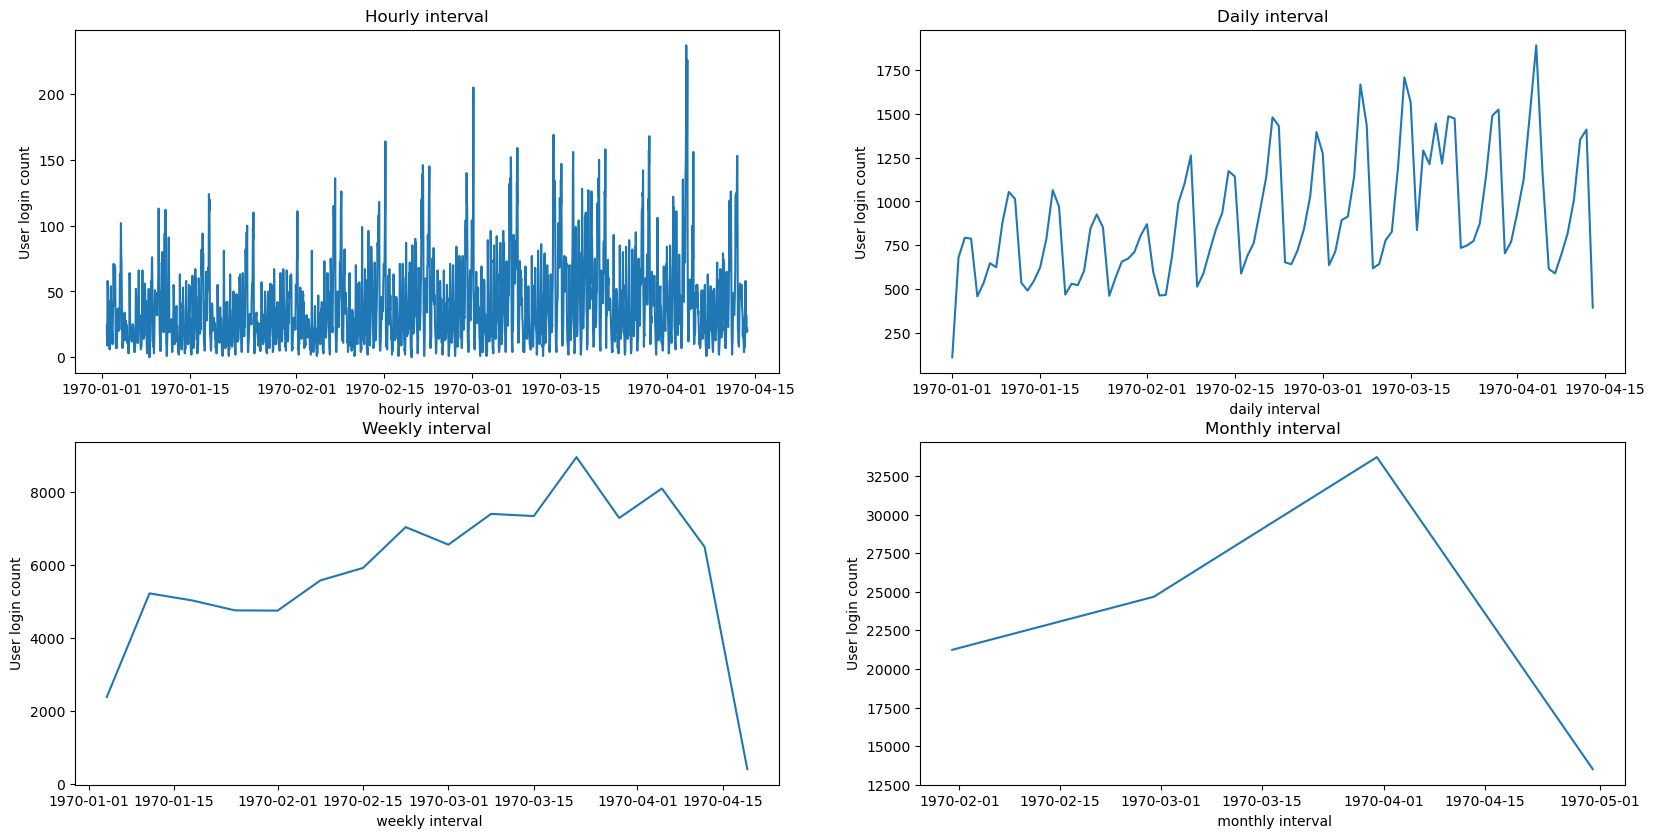

In [9]:
# Let's look at 60 min, daily, weekly, monthly, features
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20,10));

# 60-min interval
ax1.plot(df.resample('60T').sum())
ax1.set(xlabel=' hourly interval', ylabel='User login count', title='Hourly interval')

# Daily interval
ax2.plot(df.resample('D').sum())
ax2.set(xlabel=' daily interval', ylabel='User login count', title='Daily interval')

# Weekly interval
ax3.plot(df.resample('W').sum())
ax3.set(xlabel=' weekly interval', ylabel='User login count', title='Weekly interval')

# Monthly interval
ax4.plot(df.resample('M').sum())
ax4.set(xlabel=' monthly interval', ylabel='User login count', title='Monthly interval')

In [10]:
# Daily : some sort of a pattern where there are peaks at certain times of day
# Weekly : peak at weekend? drops at the end/beginning of the week
# Month : Slight peak at beginning of april? 

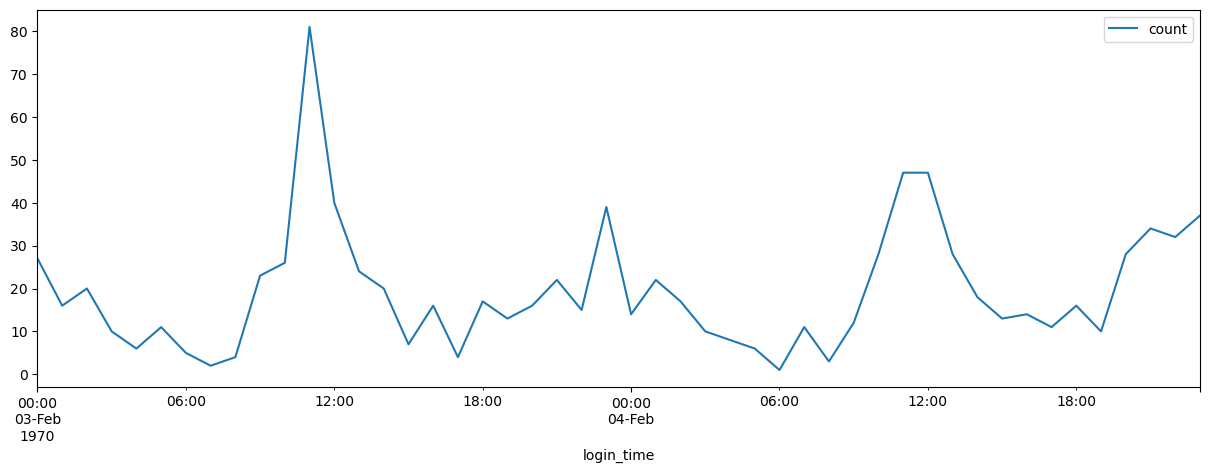

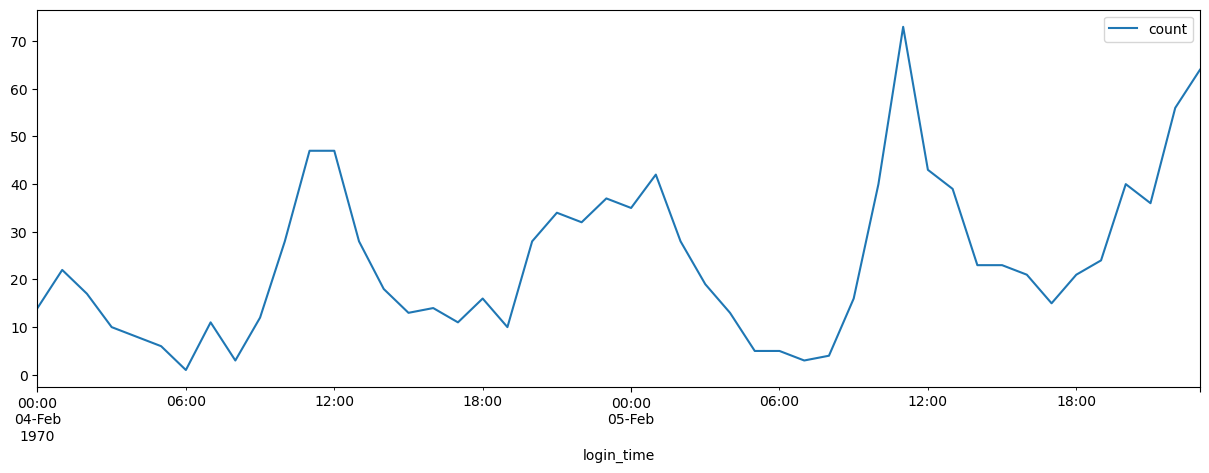

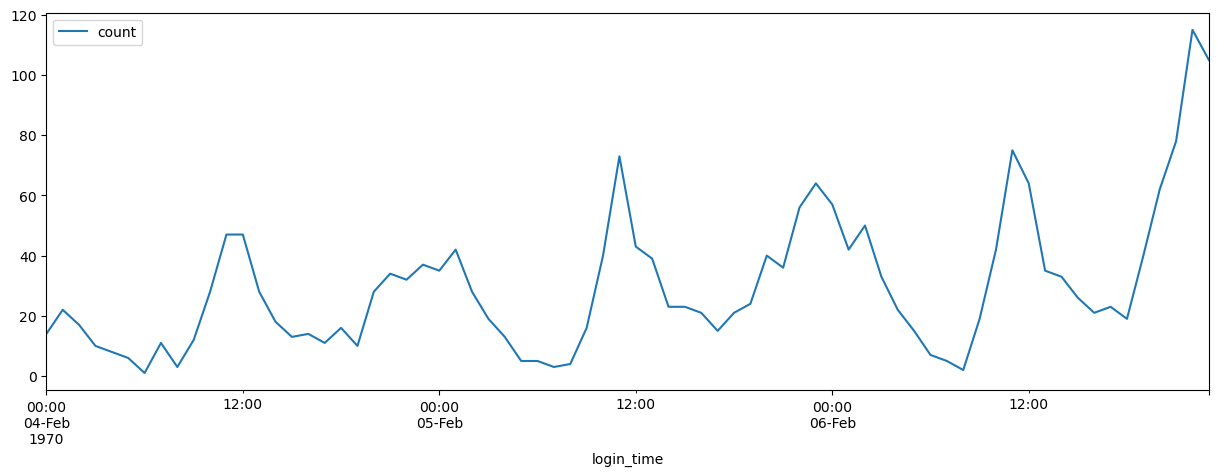

In [11]:
# Look at specific days for example
df.resample('60T').sum()['1970-02-03':'1970-02-04'].plot()
df.resample('60T').sum()['1970-02-04':'1970-02-05'].plot()
df.resample('60T').sum()['1970-02-04':'1970-02-06'].plot()
plt.show()

In [12]:
# We see common spikes every 12 hours.

#### Conclusion
The logins typically peak every 12 hours. The peak may vary but relative to the logins of close proximity these peaks take place every 12 hours : Midnight and Afternoon. 
It's also worthy to note that there is a slight peak at weekends when looking at weekly data.


# Part 2 : Experiment and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

Q: What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

A: The goal is to have a said driver be available in both cities equally. Thus, we can use city to ride ratio, where the city is the city they are least available. For example, Bob from Gotham did 100 rides, 5 of which were in Metropolis. His/her ratio would then be 5% since 5/100 = 0.05. After the experiment, we can check to see whether this metric has shifted more toward 50% in which case the experiment would have been successful. Perhaps 50% is too optimistc so the goal % can be left to the decision makers. 

Q: Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
1. how you will implement the experiment
2. what statistical test(s) you will conduct to verify the significance of the observation
3. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

A: 
1. We will need to collect the data/have readily available before the experiment. So effectively, we'll have to sets of data. Set A, the ratio before the experiment. Set B, the ratio after the experiment. It is important that the prior data is collected before any incentive information has reached the drivers so ideally we'll pretend this ratio was collected before this concern between the cities was even raised. 
2. Now, begin this reimbursement program. Collect the data now that the program is in play, ideally we want our data to be comparable/significant. This would of course depend on the exact specification, we could also do a statistical power test to determine data required. Then we could do a t-test based on samples to see whether the proportion difference is equal to 0. The t-test will tell us whether this change in proportion is significant or not when we compare our p-value(based on the data) to our alpha = (0.01,0.05, etc. ). If the change is significant, then we can make some inferences using confidence intervals about what future ratios might be.
3. Assuming our results are positive, we can see whether this program has brought higher or lower revenue when the program's cost is taken into account. Assuming the revenue is say about the same as before, perhaps we can control of WHEN this program should be active. Thus, we can conduct this experiment during specific times of the day in order to pin point the times of the day when this program would make the most difference. 



# Part 3 : Predictive Modeling


Part 3 ‐ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention (again, a few sentences will suffice).

#### Machine Learning 1.0 

In [40]:
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, cv, plot_importance
import pickle
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [29]:
# load data
with open('ultimate_data_challenge.json') as f:
    data = json.load(f)

# put data info pandas dataframe
user_data = pd.DataFrame(data)

# convert dates to datetime objects
user_data['signup_date'] = pd.to_datetime(user_data['signup_date'])
user_data['last_trip_date'] = pd.to_datetime(user_data['last_trip_date'])

# find the date the data was pulled
pull_date = user_data.last_trip_date.max()

# determine 30 days previous to the pull day
cut_off_day = pull_date - pd.Timedelta('30 days')

# add active status to dataframe 0= inactive, 1 = active
user_data['active_status'] = (user_data.last_trip_date > cut_off_day).astype('int')



In [32]:
#replace avg_rating_by_driver NaNs with mean
mean = user_data["avg_rating_by_driver"].mean()
rating = lambda row: mean if np.isnan(row) else row
user_data["avg_rating_by_driver"] = user_data["avg_rating_by_driver"].apply(rating)

#replace avg_rating_of_driver NaNs with mean
mean = user_data["avg_rating_of_driver"].mean()
rating = lambda row: mean if np.isnan(row) else row
user_data["avg_rating_of_driver"] = user_data["avg_rating_of_driver"].apply(rating)
# Add phone category
other = lambda row: "Other" if type(row) != str else row
user_data["phone"] = user_data["phone"].apply(other)

In [33]:
# add dummies to categorical data
user_data = pd.get_dummies(user_data, columns = ['city', 'phone'])

In [34]:
# separate the active and inactive users
active_user = user_data[user_data.active_status == 1]
inactive_user = user_data[user_data.active_status == 0]

In [35]:
user_data.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_status,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Other,phone_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,1,0,1,0,0,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,0,1,0,0,1,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,0,1,0,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,1,0,1,0,0,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,0,0,0,1,1,0,0


In [36]:
# fraction of active users
fraction = round((len(active_user.active_status)/len(user_data.active_status)) * 100, 2)
print('{} percent of active users.'.format(fraction))

36.62 percent of active users.


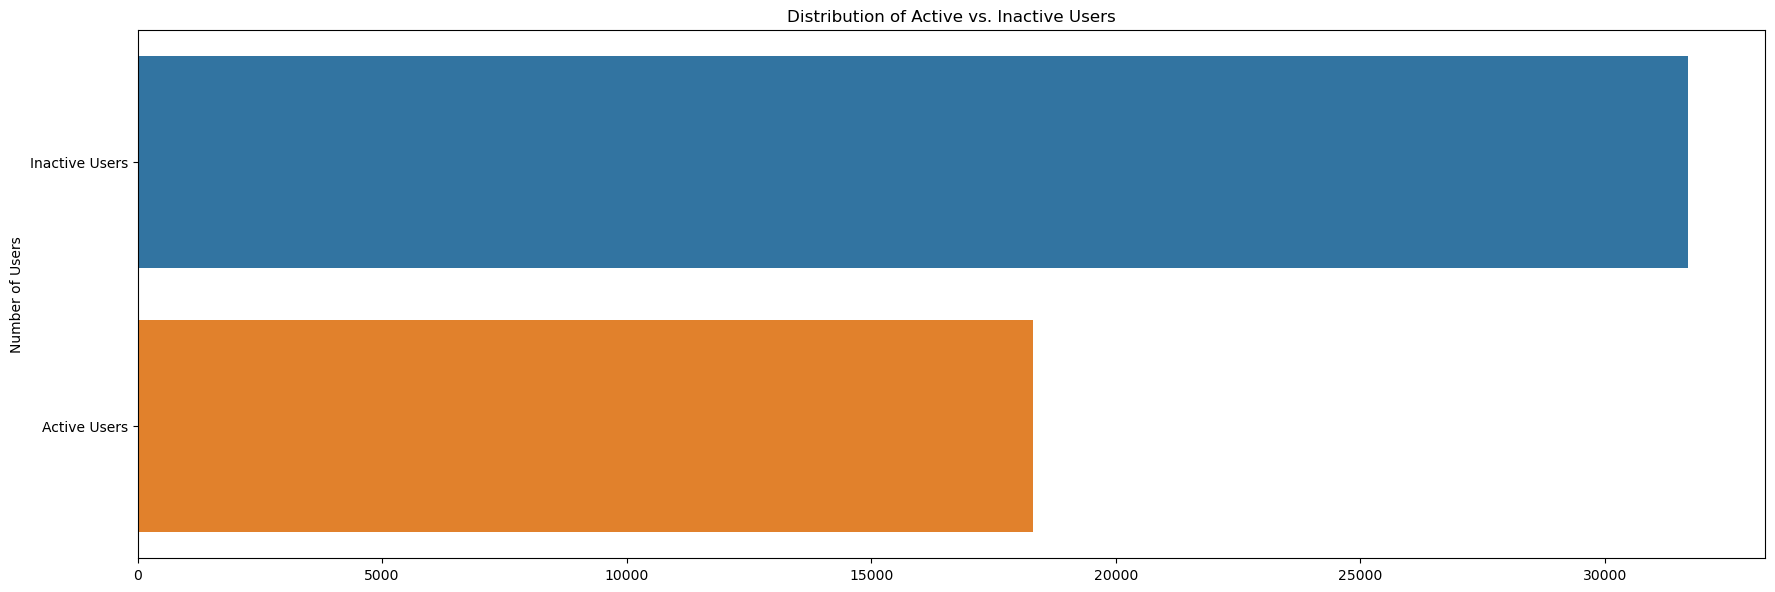

In [50]:
f, axes = plt.subplots(figsize=(21,7))
ax = sns.countplot(y=user_data["active_status"])
ax.set(title="Distribution of Active vs. Inactive Users", \
       xlabel="", ylabel="Number of Users")
ax.set_yticklabels(["Inactive Users", "Active Users"])
plt.show()

In [84]:
# Build XGBoost model
feature_columns = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'city_Astapor',
 "city_King's Landing", 'city_Winterfell', 'phone_Android','phone_iPhone']

X = user_data[feature_columns]
y = user_data.active_status
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Scale/Transform 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform (X_test)


In [72]:
# define the classifer
xg_clf_base = XGBClassifier()
# train unoptimized model
xg_clf_base.fit(X_train, y_train)
# predict the labels of unoptimized model
y_unopt_pred = xg_clf_base.predict(X_train)
# score model
un_score = accuracy_score(y_train, y_unopt_pred)
# print accuracy
print("The resulting accuracy of the unoptimized classifier is {}.".format(round(un_score,4)))

The resulting accuracy of the unoptimized classifier is 0.8337.


In [73]:
# predict the labels of unoptimized model using the test set
y_unopt_test = xg_clf_base.predict(X_train)
# score model
test_score = accuracy_score(y_train, y_unopt_test)
# print accuracy
print("The resulting accuracy of the unoptimized classifier is {}.".format(round(test_score,4)))

The resulting accuracy of the unoptimized classifier is 0.8337.


In [74]:
# define the classifer
xg_clf_base2 = XGBClassifier(objective = 'binary:logistic', random_state = 42, n_estimators=200, max_depth= 8)
# train unoptimized model
xg_clf_base2.fit(X_train, y_train)
# predict the labels of unoptimized model
y_unopt_pred = xg_clf_base2.predict(X_train)
# score model
un_score = accuracy_score(y_train, y_unopt_pred)
# print accuracy
print("The resulting accuracy of the unoptimized classifier is {}.".format(round(un_score,4)))


The resulting accuracy of the unoptimized classifier is 0.9098.


In [75]:
y_opt_test = xg_clf_base2.predict(X_test)
# score model
test_score = accuracy_score(y_test, y_opt_test)
# print accuracy
print("The resulting accuracy of the optimized classifier for the test set is {}.".format(round(test_score,4)))

The resulting accuracy of the optimized classifier for the test set is 0.7762.


In [76]:
# Huge difference in accuracy comparing test vs training set results. Overfit issues.

In [44]:
# hyptertuning parameters
parameters = {
    'max_delta_step':[0,0.05],
    'scale_pos_weight':[0.95, 0.9],
    'subsample':[1,0.8],
    'learning_rate': [0.25, 0.2, 0.1],
    'min_child_weight':[0,1,2],
    'gamma':[1, 2, 3]
    }

In [46]:
# define the classifier
xg_clf = XGBClassifier(objective = 'binary:logistic', random_state = 42, n_estimators=10, max_depth= 8)

# RandomSearch
grid_search = GridSearchCV(param_grid= parameters, estimator = xg_clf, cv=3, scoring='accuracy')
grid_search.fit(X_train,y_train)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=8, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=10, n_jobs=None,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, valid

In [51]:
# Print best parameters and results
print(grid_search.best_params_)
print(grid_search.best_score_)

{'gamma': 1, 'learning_rate': 0.25, 'max_delta_step': 0, 'min_child_weight': 0, 'scale_pos_weight': 0.95, 'subsample': 0.8}
0.7836285131144619


In [53]:
# optimized parameters
optimized_parameters = {'objective':'binary:logistic',
                        'n_estimators': 10,
                        'random_state': 42,
                        'subsample': 0.8, 
                        'scale_pos_weight': 0.95, 
                        'min_child_weight': 0, 
                        'max_depth': 8, 
                        'max_delta_step': 0, 
                        'learning_rate': 0.25, 
                        'gamma': 1
                       }

In [62]:
# instantiate classifier with best params
xg_clf_opt = XGBClassifier(**optimized_parameters)
xg_clf_opt.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=8,
              min_child_weight=0, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.95, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
# Evaluation of the tuned model
# predict the labels
y_opt_pred = xg_clf_opt.predict(X_train)
# score model
score = accuracy_score(y_train, y_opt_pred)
# print accuracy
print("The resulting accuracy of the optimized classifier is {}.".format(round(score,4)))

The resulting accuracy of the optimized classifier is 0.8084.


In [64]:
# Evaluation on test set
# predict the labels
y_opt_test = xg_clf_opt.predict(X_test)
# score model
test_score = accuracy_score(y_test, y_opt_test)
# print accuracy
print("The resulting accuracy of the optimized classifier for the test set is {}.".format(round(test_score,4)))

The resulting accuracy of the optimized classifier for the test set is 0.785.


In [65]:
# Test set performs worse with tuned parameters, --> overfit

In [44]:
# The unoptimized model performs better, we'll go with base model to avoid overfitting.

In [77]:
# instantiate classifier
xg_clf_final = XGBClassifier()
# train final model
xg_clf_final.fit(X, y)
# save model
pickle.dump(xg_clf_final, open('final_model.pickle', 'wb'))


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

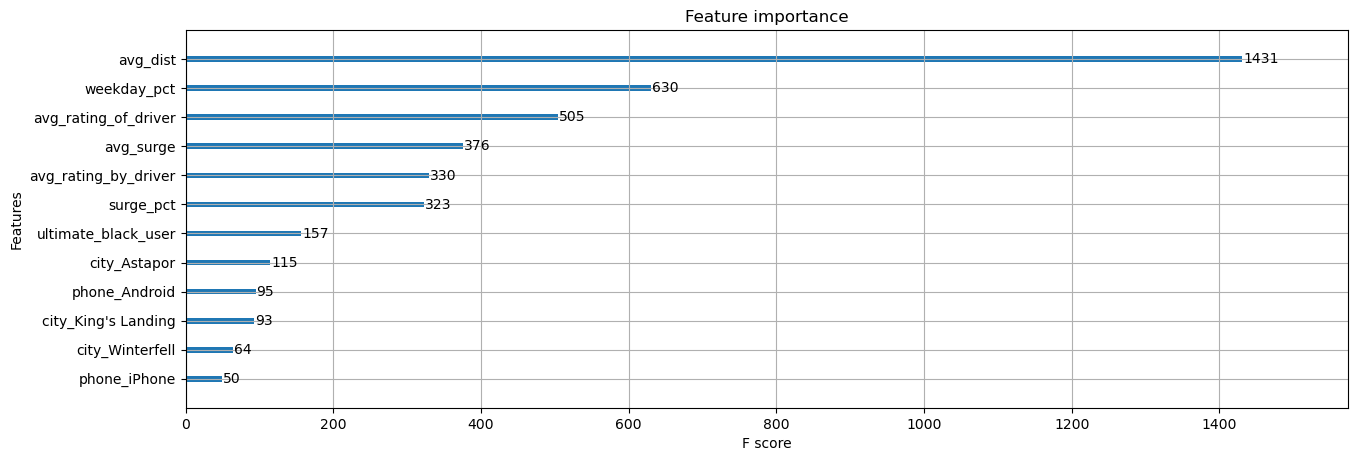

In [78]:
plot_importance(xg_clf_final)

##### Takeaways
XGBoost produced a quite accurate model with the default parameters. Average distance is the most important feature for this model. 

Improvments: Try more models to compare metrics. 

In [98]:
print(X_train.shape)
print(y_train.shape)

(35000, 12)
(35000,)


In [99]:
print(X_test.shape)
print(y_test.shape)

(15000, 12)
(15000,)


In [100]:
# from sklearn.neighbors import KNeighborsClassifier

# #lets try the out of the box classifier with 10 neighbors
# knn = KNeighborsClassifier(n_neighbors=10)

# knn.fit(X_train, X_test)

# #test the accuracy
# knn.score(y_train, y_test)

In [101]:
# Good score for out of the box model

In [102]:
# # Tune our model
# #specify a parameter grid to search over
# parameters = {
#     'n_neighbors': [10, 13, 15],
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan', 'minkowski'],
# }

# knn_cv = GridSearchCV(knn, parameters, cv=5) #specify GridSearchCV object

# knn_cv.fit(X_train, X_test) #fit to training data

In [103]:
# # Find the best parameters 
# knn_cv.best_params_

In [104]:
# #check for accuracy improvement
# knn_cv.score(y_train, y_test)

In [105]:
# Slight improvement, which is good.

In [106]:
# # Check useful metrics 

# #predict classifications
# y_pred = knn_cv.predict(y_train)

# print(classification_report(y_test, y_pred)) # print classification report and confusion matrix

# cm= confusion_matrix(y_test,y_pred)
# print('confusion matrix:')
# print(cm)

In [94]:
# model does a better job at predicting a user who will become inactive and not vice versa. 